In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model, preprocessing
import scipy.stats as sps

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Methods


https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faqhow-are-the-likelihood-ratio-wald-and-lagrange-multiplier-score-tests-different-andor-similar/#:~:text=The%20Wald%20test%20works%20by,are%20simultaneously%20equal%20to%20zero




## Data

In [2]:
g1_count = 100
g2_count = 100

x1 = np.arange(30, 40, 10/g1_count)
y1 = x1 + 3 + np.random.normal(loc=0, scale=1, size=g1_count)

x2 = np.arange(0, 10, 10/g2_count)
y2 = 1.9*x2 + 3 + np.random.normal(loc=0, scale=1, size=g2_count)

df = pd.DataFrame({"x1": x1, "x2": x2, "y1": y1, "y2": y2})

In [3]:
df

,x1,x2,y1,y2
0,30.0,0.0,33.207317,1.123880
1,30.1,0.1,32.873127,1.097365
2,30.2,0.2,34.376514,2.691373
3,30.3,0.3,35.723729,4.243895
4,30.4,0.4,33.188273,4.346516
...,...,...,...,...
95,39.5,9.5,41.650990,21.620298
96,39.6,9.6,43.372440,20.788269
97,39.7,9.7,42.214964,20.561244
98,39.8,9.8,43.661361,21.885978


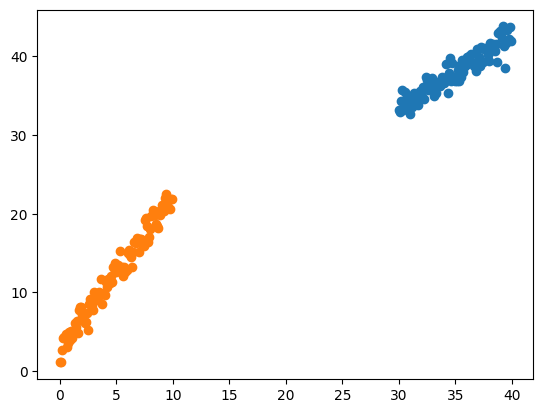

In [4]:
fig, ax = plt.subplots()

ax.scatter(x1,y1)
ax.scatter(x2,y2)

## Linear models

### Seperate Models

#### Scikit-learn model

In [5]:
lm1_sk = linear_model.LinearRegression().fit(x1.reshape(-1,1), y1.reshape(-1,1))
lm2_sk = linear_model.LinearRegression().fit(x2.reshape(-1,1), y2.reshape(-1,1))
print(f" y = {lm1_sk.coef_[0][0]}x + {lm1_sk.intercept_[0]}")
print(f" y = {lm2_sk.coef_[0][0]}x + {lm2_sk.intercept_[0]}")

 y = 0.9238073065956339x + 5.675280224008674
 y = 1.9539965125332124x + 2.785794428593606


#### Statsmodels model

Endog is the dependent variable while exog is the independent variable

In [6]:
x1s = df["x1"]
x2s = df["x2"]

x1s = sm.add_constant(x1s) # add column of ones to include intercept term in model
x2s = sm.add_constant(x2s) # add column of ones to include intercept term in model

lm1_sm = sm.OLS(endog=df["y1"], exog=x1s).fit()
lm2_sm = sm.OLS(endog=df["y2"], exog=x2s).fit()
# lm1 = sm.OLS(endog=df["y1"], exog=df[["x1"]].assign(intercept=1)).fit()
# lm2 = sm.OLS(endog=df["y2"], exog=df[["x2"]].assign(intercept=1)).fit()

In [7]:
lm1_sm.params

const    5.675280
x1       0.923807
dtype: float64

In [8]:
lm1_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     700.4
Date:                Mon, 22 May 2023   Prob (F-statistic):           1.96e-46
Time:                        12:45:43   Log-Likelihood:                -141.64
No. Observations:                 100   AIC:                             287.3
Df Residuals:                      98   BIC:                             292.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6753      1.224      4.636      0.000       3.246       8.104
x1             0.9238      0.035     26.466      0.000       0.855       0.993
==============================================================================
Omnibus:                        2.709   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.258   Jarque-Bera (JB):                2.104
Skew:                          -0.250   Prob(JB):                        0.349
Kurtosis:                       3.505   Cond. No.                         426.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
lm2_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     3130.
Date:                Mon, 22 May 2023   Prob (F-statistic):           3.49e-76
Time:                        12:45:43   Log-Likelihood:                -141.70
No. Observations:                 100   AIC:                             287.4
Df Residuals:                      98   BIC:                             292.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7858      0.200     13.920      0.000       2.389       3.183
x2             1.9540      0.035     55.948      0.000       1.885       2.023
==============================================================================
Omnibus:                        1.862   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.394   Jarque-Bera (JB):                1.423
Skew:                          -0.077   Prob(JB):                        0.491
Kurtosis:                       2.437   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
lm1_sm.bse

const    1.224110
x1       0.034906
dtype: float64

In [11]:
lm1_sm.pvalues

const    1.095806e-05
x1       1.964909e-46
dtype: float64

#### Statsmodel model 2

In [12]:
lm1_b = smf.ols(formula="y1 ~ x1", data=df).fit()
lm1_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     700.4
Date:                Mon, 22 May 2023   Prob (F-statistic):           1.96e-46
Time:                        12:45:43   Log-Likelihood:                -141.64
No. Observations:                 100   AIC:                             287.3
Df Residuals:                      98   BIC:                             292.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6753      1.224      4.636      0.000       3.246       8.104
x1             0.9238      0.035     26.466      0.000       0.855       0.993
==============================================================================
Omnibus:                        2.709   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.258   Jarque-Bera (JB):                2.104
Skew:                          -0.250   Prob(JB):                        0.349
Kurtosis:                       3.505   Cond. No.                         426.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Scipy stats model

In [13]:
lm1_sp = sps.linregress(x=x1, y=y1, alternative='two-sided')
lm2_sp = sps.linregress(x=x2, y=y2, alternative='two-sided')
print(f" y = {lm1_sp.slope}x + {lm1_sp.intercept}")
print(f" y = {lm2_sp.slope}x + {lm2_sp.intercept}")

 y = 0.9238073065956346x + 5.675280224008645
 y = 1.953996512533214x + 2.785794428593597


### Combined models

# Ancova

http://www.biostathandbook.com/ancova.html

https://web.archive.org/web/20230223045335/http://www.biostathandbook.com/ancova.html

https://www.reneshbedre.com/blog/ancova.html

https://web.archive.org/web/20230201184317/https://www.reneshbedre.com/blog/ancova.html

https://www.statology.org/ancova/


Maybe ANCOVA Method?

https://statisticsbyjim.com/regression/comparing-regression-lines/

## Application and Assumptions

Used to test for significance between different linear models that include at least one continuous and one categorical independent variable

>Null hypotheses:
>* Slopes of regression lines are all equal
>* Y intercepts of regression lines are all the same/ adjusted means of the group (least squares means) are the same


>Assumptions:
>* Linear relationship between dependent variable and covariate
>* Normally distributed residuals
>* Dependent variable and covariate are continuous
>* Equal variances (homogeneity) between sample populations
>* No interaction between categorical independent variable and covariate (homogeneity within-group regression slopes) i.e. slopes of lineas in different samples should be the same

In [14]:
x_c = np.concatenate((x1, x2))
y_c = np.concatenate((y1, y2))
group_list = np.concatenate((np.array((len(x1)*["A"])),np.array((len(x2)*["B"]))))

df_c = pd.DataFrame({"x": x_c, "y": y_c, "group": group_list})

df_c

,x,y,group
0,30.0,33.207317,A
1,30.1,32.873127,A
2,30.2,34.376514,A
3,30.3,35.723729,A
4,30.4,33.188273,A
...,...,...,...
195,9.5,21.620298,B
196,9.6,20.788269,B
197,9.7,20.561244,B
198,9.8,21.885978,B


In [15]:
lm_ancova = smf.ols('y ~ group + x', data=df_c).fit()  # Additive moderation model

In [16]:
lm_ancova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     5526.
Date:                Mon, 22 May 2023   Prob (F-statistic):          9.38e-174
Time:                        12:45:43   Log-Likelihood:                -400.30
No. Observations:                 200   AIC:                             806.6
Df Residuals:                     197   BIC:                             816.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.3273      1.555     -7.927      0.000     -15.394      -9.260
group[T.B]    17.6628      1.350     13.082      0.000      15.000      20.325
x              1.4389      0.044     32.557      0.000       1.352       1.526
==============================================================================
Omnibus:                        0.689   Durbin-Watson:                   0.561
Prob(Omnibus):                  0.709   Jarque-Bera (JB):                0.774
Skew:                          -0.134   Prob(JB):                        0.679
Kurtosis:                       2.856   Cond. No.                         405.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
lm_ancova.pvalues

Intercept     1.633895e-13
group[T.B]    1.486065e-28
x             3.247976e-81
dtype: float64

## Test for normal residuals

In [18]:
resid_ancova = lm_ancova.resid
resid_ancova

0      2.367536
1      1.889455
2      3.248952
3      4.452277
4      1.772931
         ...   
195    2.615217
196    1.639298
197    1.268383
198    2.449226
199    2.225383
Length: 200, dtype: float64

(array([ 1.,  3., 10., 15., 43., 48., 34., 27., 16.,  3.]),
 array([-5.79964439, -4.77445223, -3.74926008, -2.72406792, -1.69887576,
        -0.6736836 ,  0.35150855,  1.37670071,  2.40189287,  3.42708503,
         4.45227719]),
 <BarContainer object of 10 artists>)

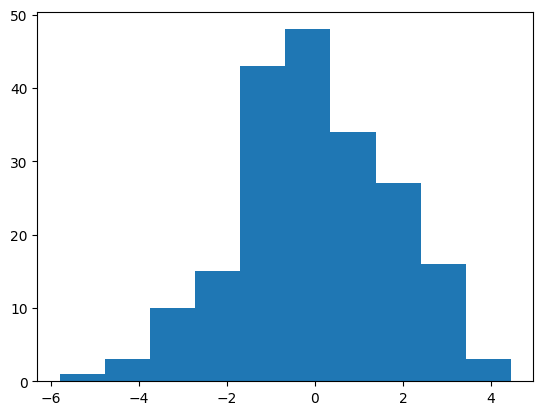

In [19]:
plt.hist(lm_ancova.resid)

In [20]:
test_result_names = ['Jarque-Bera', 'JB_p_value', 'Skew', 'Kurtosis']
jb_test = sm.stats.stattools.jarque_bera(resid_ancova, axis=0)
jb_results = dict(zip(test_result_names, jb_test))
jb_results

{'Jarque-Bera': 0.7741963342966028,
 'JB_p_value': 0.6790244337624327,
 'Skew': -0.13437944345948102,
 'Kurtosis': 2.85622162604316}

In [21]:
sps.shapiro(resid_ancova)

ShapiroResult(statistic=0.9943627715110779, pvalue=0.6548441648483276)

In [22]:
sps.normaltest(resid_ancova)

NormaltestResult(statistic=0.689154911565433, pvalue=0.7085196711157375)

## Test for equal variances between groups

In [23]:
#sps.bartlett(df_c["y"], df_c["group"])

sps.bartlett(df["y1"], df["y2"])

BartlettResult(statistic=44.66232400906977, pvalue=2.341193034087987e-11)

## Test for interaction of catagorical independent variable and covariate

In [24]:
sm.stats.anova_lm(lm_ancova, typ=2)

,sum_sq,df,F,PR(>F)
group,557.042906,1.0,171.128137,1.486065e-28
x,3450.386102,1.0,1059.986835,3.247976e-81
Residual,641.258967,197.0,NaN,NaN


In [25]:
lm_inter = smf.ols('y ~ group * x', data=df_c).fit()  # Additive moderation model
lm_inter.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.195e+04
Date:                Mon, 22 May 2023   Prob (F-statistic):          1.31e-221
Time:                        12:45:43   Log-Likelihood:                -283.34
No. Observations:                 200   AIC:                             574.7
Df Residuals:                     196   BIC:                             587.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.6753      1.224      4.635      0.000       3.260       8.090
group[T.B]      -2.8895      1.241     -2.329      0.021      -5.336      -0.443
x                0.9238      0.035     26.458      0.000       0.855       0.993
group[T.B]:x     1.0302      0.049     20.863      0.000       0.933       1.128
==============================================================================
Omnibus:                        0.966   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.617   Jarque-Bera (JB):                0.899
Skew:                          -0.164   Prob(JB):                        0.638
Kurtosis:                       2.970   Cond. No.                         613.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

PR(> F) – This is the p-value associated with the F statistic of a given effect and test statistic

In [26]:
sm.stats.anova_lm(lm_inter, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,21.822429,1.0,21.482749,6.505263e-06
group,5.509683,1.0,5.423921,2.088181e-02
x,711.112165,1.0,700.043253,1.321611e-66
group:x,442.159863,1.0,435.277365,1.133748e-51
Residual,199.099104,196.0,NaN,NaN


In [28]:
sm.stats.anova_lm(lm_ancova, lm_inter)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,197.0,641.258967,0.0,NaN,NaN,NaN
1,196.0,199.099104,1.0,442.159863,435.277365,1.133748e-51


In [29]:
sm.stats.anova_lm(lm_inter, lm_ancova)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,196.0,199.099104,0.0,NaN,NaN,NaN
1,197.0,641.258967,-1.0,-442.159863,135.835127,NaN


In [ ]:

# formula = "S ~ C(E) + C(M) + X"
# lm = ols(formula, salary_table).fit()

# table1 = anova_lm(lm, interX_lm)
# print(table1)

# interM_lm = ols("S ~ X + C(E)*C(M)", data=salary_table).fit()
# print(interM_lm.summary())

# table2 = anova_lm(lm, interM_lm)
# print(table2)

# Z statistic

https://www.jstor.org/stable/2782277

https://stats.stackexchange.com/questions/435644/is-there-a-method-to-look-for-significant-difference-between-two-linear-regressi

https://stats.stackexchange.com/questions/55501/test-a-significant-difference-between-two-slope-values?noredirect=1&lq=1

**Two Sample Z-test**
>Null hypothesis: two population means are equal
>* 
    
>Inputs: 
>* dataset

>Returns: 
>* 

>Assumptions:
>* 


$$z = \frac{(\bar{x_1} - \bar{x_2})}{\sqrt{\sigma_1^2/n_1 + \sigma_2^2/n_2}}$$
Standard error of the sample mean

$$\sigma_{\bar{x}} = \frac{\sigma_x}{\sqrt{n}}$$

Z-statistic for model coefficients
$$z = \frac{(\beta_1 - \beta_2)}{\sqrt{SE_1^2 + SE_2^2}}$$

* $SE$ = standard error

In [ ]:
def zstat_coeff(b1, se1, b2, se2):
    return ((b1-b2)/np.sqrt(se1**2 + se2**2)) 

In [ ]:
b1 = lm1_sm.params[0]
se1 = lm1_sm.bse[0]
b2 = lm2_sm.params[0]
se2 = lm2_sm.bse[0]

In [ ]:
p_value = 2*sps.norm.pdf(-abs(zstat_coeff(b1,se1,b2,se2)))
p_value

In [ ]:
p_value_c = 2*sps.norm.cdf(-abs(zstat_coeff(b1,se1,b2,se2)))
p_value_c

In [ ]:
# p_value = 2*pnorm(-abs(compare.coeff(b1,se1,b2,se2)))
# p_value

# ANOVA

https://stats.stackexchange.com/questions/45528/comparing-two-linear-regression-models

https://stats.stackexchange.com/questions/57492/what-test-should-be-used-to-tell-if-two-linear-regression-lines-are-significantl

# Wald Test

https://en.wikipedia.org/wiki/Wald_test

https://www.statology.org/wald-test-python/

https://andrewpwheeler.com/2021/06/18/wald-tests-via-statsmodels-python/

https://stats.stackexchange.com/questions/592311/wald-test-failing-to-reject-null-hypothesis-that-a-predictor-is-insignificant-in

https://stackoverflow.com/questions/28926922/statsmodels-wald-test-for-significance-of-trend-in-coefficients-in-linear-regr

In [ ]:
lm_c = smf.ols("y1 ~ X1 + X2", df).fit()
results.summary()

In [ ]:
results.wald_test_terms()

In [ ]:
# OLSResults.wald_test_terms(skip_single=False, extra_constraints=None, combine_terms=None, scalar=None)

# ols = sm.regression.linear_model.OLS(X,y)
ols = sm.regression.linear_model.OLS("y1 ~ X1 + X2", df)
# ols_res = ols.fit()
# ols_res.wald_test_terms()

#results = smf.ols('mpg ~ disp + carb + hp + cyl', df).fit()
#results.wald_test('(hp = 0, cyl = 0)')

# res_ols = ols("np.log(Days+1) ~ C(Duration, Sum)*C(Weight, Sum)", data).fit()
#res_ols.wald_test_terms()

# F-Test

# T-Test

# Unclear

https://stats.stackexchange.com/questions/151916/are-two-linear-regression-models-significantly-different

https://stats.stackexchange.com/questions/93524/testing-whether-two-regression-coefficients-are-significantly-different-in-r-id?rq=1